## Final Project

 Group 10
 #Members: 

*   Omar Altaher
*   Moduana Pobee-Orleans
*   Surya Chaitanya Kokkirimetla







---



Clearly define a business problem that can be addressed through the application of analytics. Who does the problem affect? What are the financial and social implications of a potential solution? (1-2 paragraphs) (10 pts.)

The business problem we are facing is high customer churn rates, which is reducing revenue and impacting growth. We will advise the company to implement targeted strategies to improve retention, increasing revenue and profitability by understanding the reasons behind churn and predicting at-risk customers.

We are analyzing customer data to determine the factors driving churn and identify high-churn-risk customers. Our client can then develop personalized offers and service improvements to reduce churn and successfully decrease churn rates which will increase revenue, boost reputation, enhance customer satisfaction, and support the financial stability and growth of the Telco company. The solution benefits the company, employees, customers, and community by addressing high churn’s financial, social, and reputational impacts. Decreasing customer churn has the potential to significantly and positively transform our client’s business.



---



Identify the data that you are planning to use. Perform exploratory data analysis and build preliminary models that we covered in class to confirm that you would be able to model the problem using data mining techniques. (40 pts.)

We are using Telco's customer data from Kagel. The data includes demographic information about customers, details about their service plans, and our key variable of interest, customer churn.
> https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=samples-telco-customer-churn


> https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D

Repository: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


## Installing and importing necessary packages and tools

In [1]:
# installing eli5, pycaret, mlflow packages

!pip install eli5
!pip install pycaret mlflow
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=f1d5dd90d64667929be483f883d178d9f65261e4a57186073f79a9e984b62f42
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build w

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import statsmodels.api as sm
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import eli5
from eli5.sklearn import PermutationImportance
from pycaret.classification import *
import mlflow

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fd4f00f6550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so: cannot open shar

## Uploading the data

In [3]:
from google.colab import files
uploaded = files.upload()

import io
tcc_data = pd.read_csv(io.BytesIO(uploaded['TelcoCustomerChurn.csv']))

Saving TelcoCustomerChurn.csv to TelcoCustomerChurn.csv


## Data pre-processing 

In [4]:
tcc_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
tcc_data.columns
print('Variables')
print(tcc_data.columns)
tcc_data.shape
print('Shape')
print(tcc_data.shape)

Variables
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Shape
(7043, 21)


In [6]:
#Removing unnecessary variables.
tcc_data = tcc_data.drop(['customerID'], axis = 1)

In [7]:
tcc_data.shape

(7043, 20)

In [8]:
tcc_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Looking for empty cells
empty_cols = tcc_data.isna().sum() > 0
print(empty_cols)
#This will return True if any column has at least one empty cell, False otherwise. this code has been used instead of a visual because of the big number of data.

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool



> While converting the data, we ran into an issue with 'TotalCharges' for containing cells that have spaces and no numbers and did not show up in the empty cell test.

In [10]:
tcc_data['TotalCharges'] = tcc_data['TotalCharges'].replace(' ', np.nan)
tcc_data = tcc_data.dropna(subset=['TotalCharges'])

In [11]:
tcc_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [12]:
#Transforming our target variable yes/no for 1/0
tcc_data['Churn'] = tcc_data['Churn'].replace(['No'], 0).replace(['Yes'], 1).astype('int')

Tranforming Object data types to Category to improve processing speed.

In [13]:
# Transforming data types
for col in tcc_data.select_dtypes(include=['object']).columns:
    tcc_data[col] = tcc_data[col].astype('category')

tcc_data['SeniorCitizen'] = tcc_data['SeniorCitizen'].astype('category')

tcc_data['TotalCharges'] = tcc_data['TotalCharges'].astype('float')

tcc_data['Churn'] = tcc_data['Churn'].astype('int')

print(tcc_data.dtypes)

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object


<Axes: >

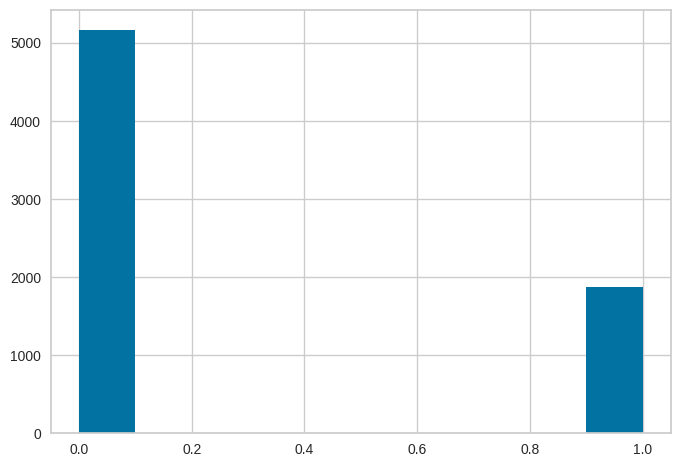

In [14]:
tcc_data.Churn.hist()

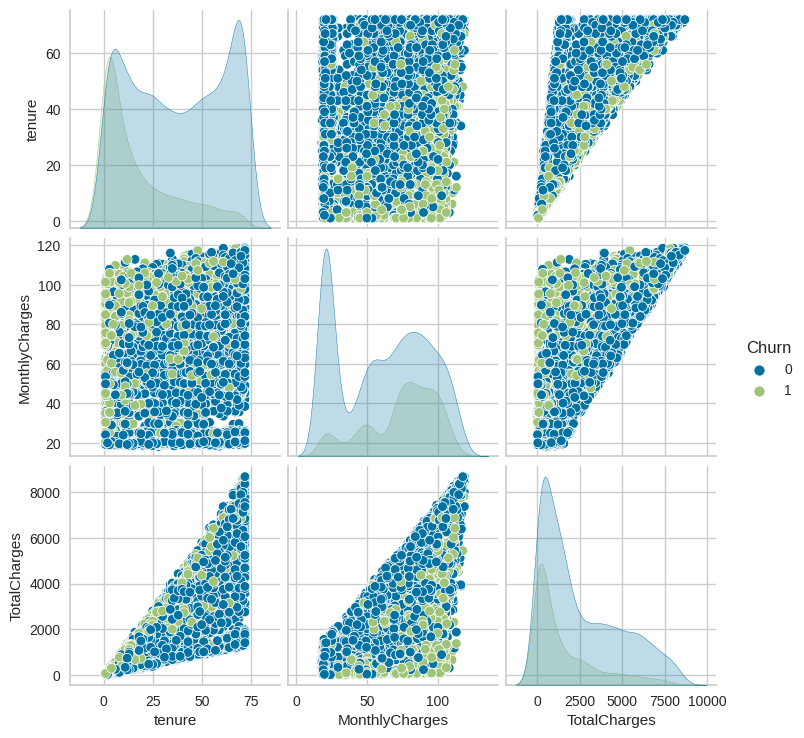

In [15]:
sns.pairplot(tcc_data, hue = 'Churn')

No outliers have been detected in the pairplot.
In the above pairplot when a cone or fan shape is observed, it shows heteroscedasticity.

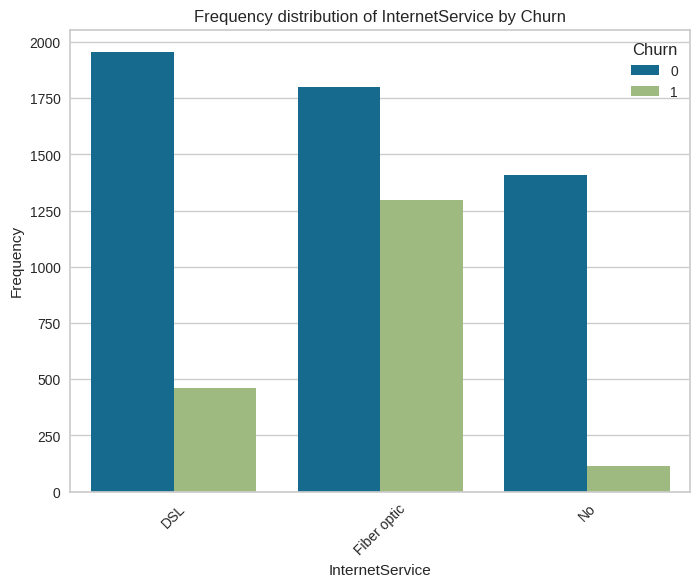

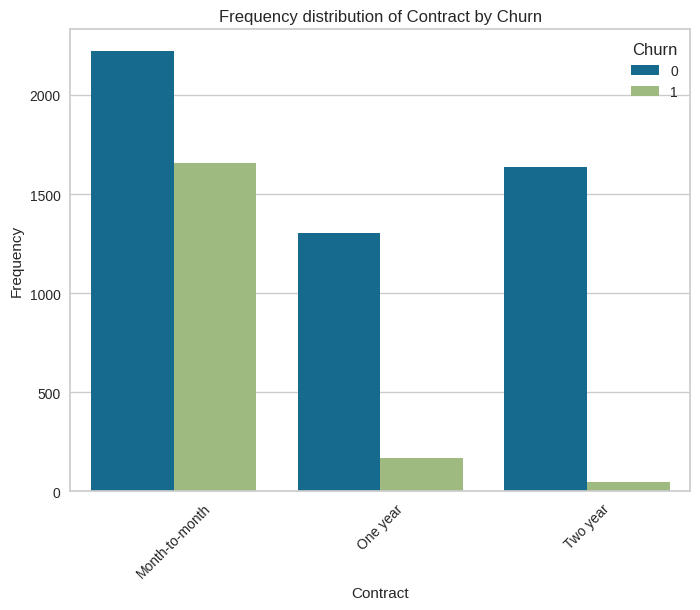

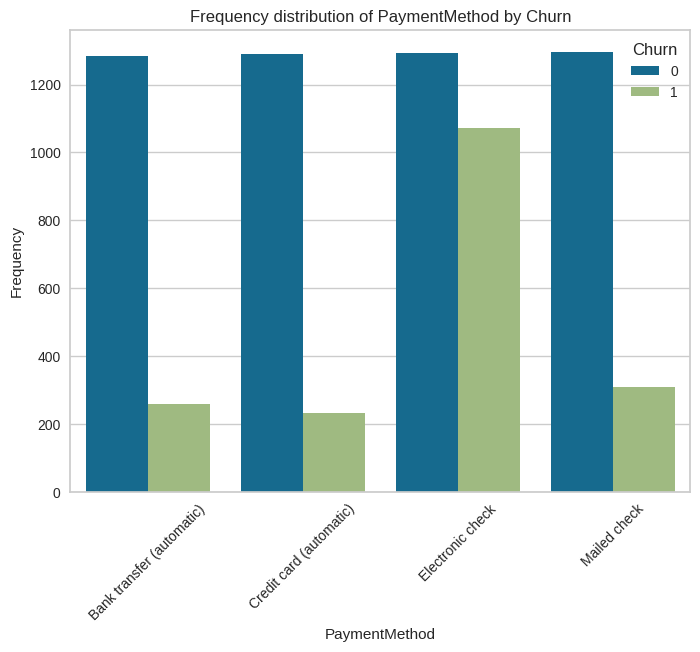

In [16]:
columns = ['InternetService', 'Contract', 'PaymentMethod']

for column in columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=column, hue='Churn', data=tcc_data)
    plt.title(f'Frequency distribution of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

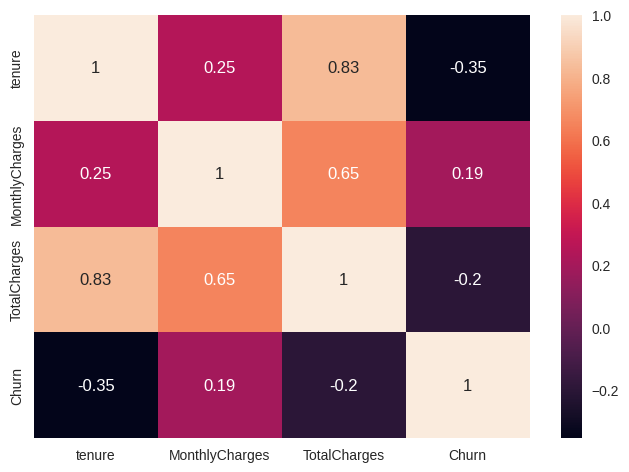

In [17]:
sns.heatmap(tcc_data.corr(), annot = True)
plt.show()

In [18]:
df_dummies = pd.get_dummies(tcc_data, drop_first=True)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


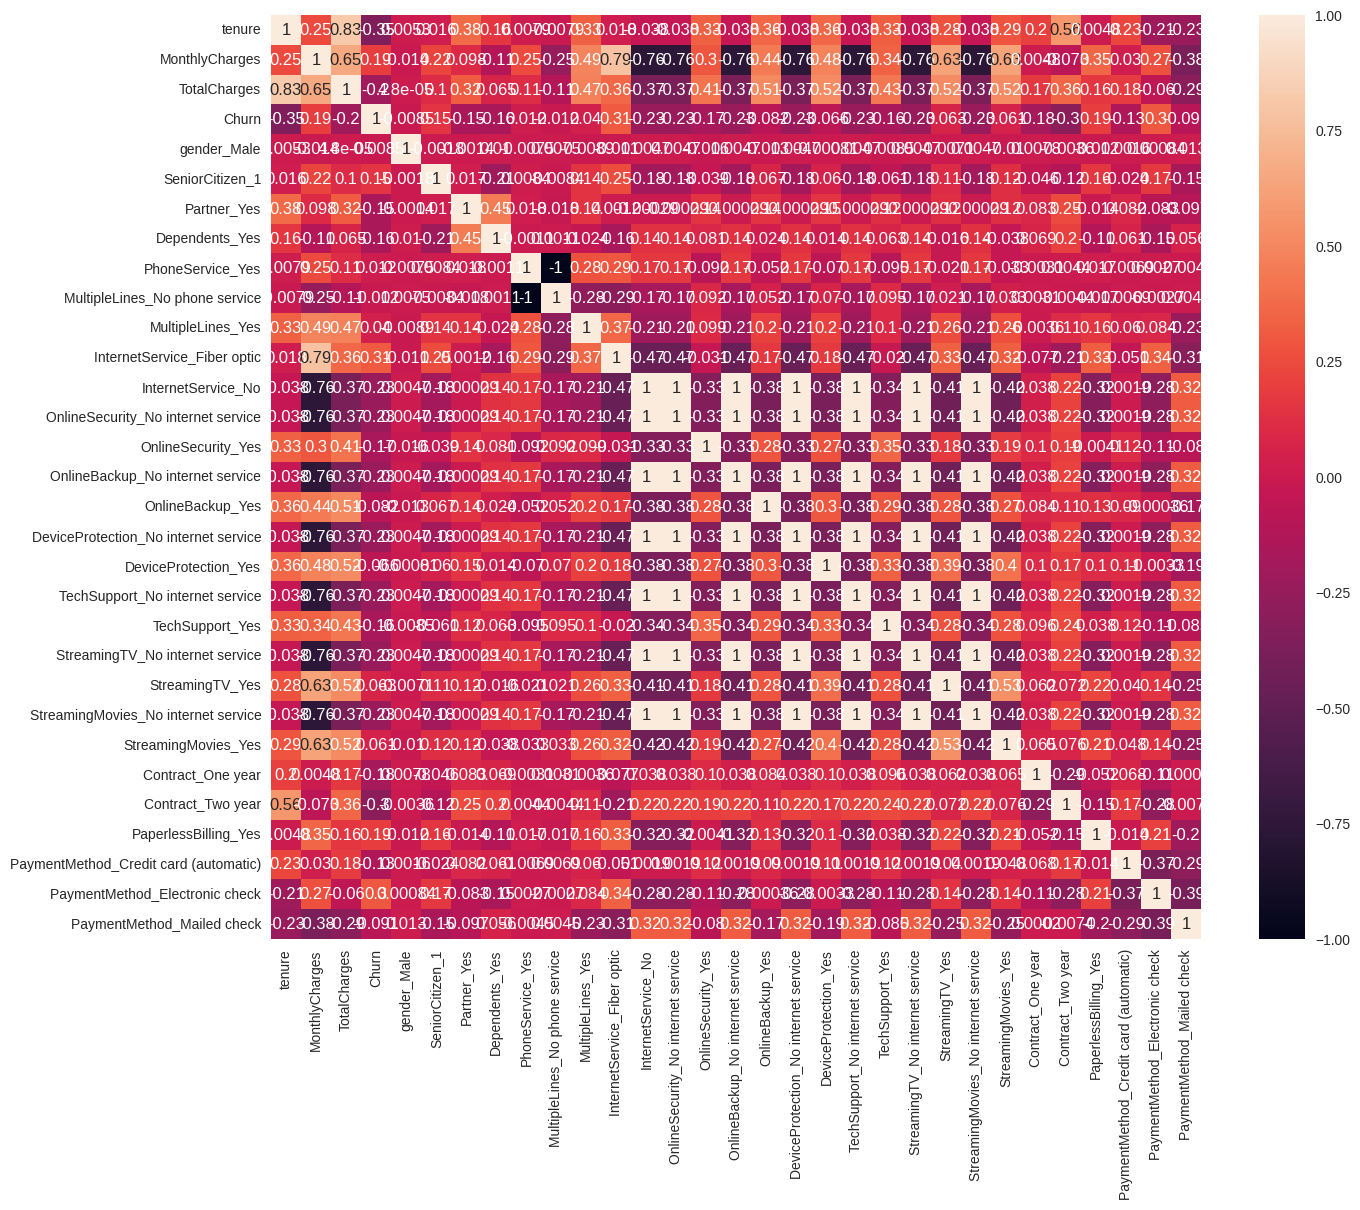

In [19]:
corrmat = df_dummies.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, annot = True)
plt.show()

In [20]:
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_dummies = df_dummies.drop(to_drop, axis=1)

In [21]:
# Dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

##LOGISTIC REGRESSION

In [22]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [23]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [24]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_trainLR,y_trainLR)

LogisticRegression(solver='liblinear')

In [25]:
y_predLR = logmodel.predict(X_testLR)

In [26]:
logmodel.coef_

array([[-3.27562844, -0.05584495,  1.32295483,  0.02267333,  0.21411363,
        -0.04257373, -0.06392259, -0.4135706 ,  0.1951983 ,  0.37277718,
         0.78391896, -0.74018298, -0.35668903, -0.15332331, -0.071644  ,
        -0.3144116 ,  0.29049257,  0.32550518, -0.71508811, -1.50325644,
         0.26351468, -0.00445119,  0.30115644, -0.12817348]])

In [27]:
confusion_matrix(y_testLR,y_predLR)

array([[1382,  173],
       [ 250,  305]])

In [28]:
print(classification_report(y_testLR,y_predLR))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1555
           1       0.64      0.55      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



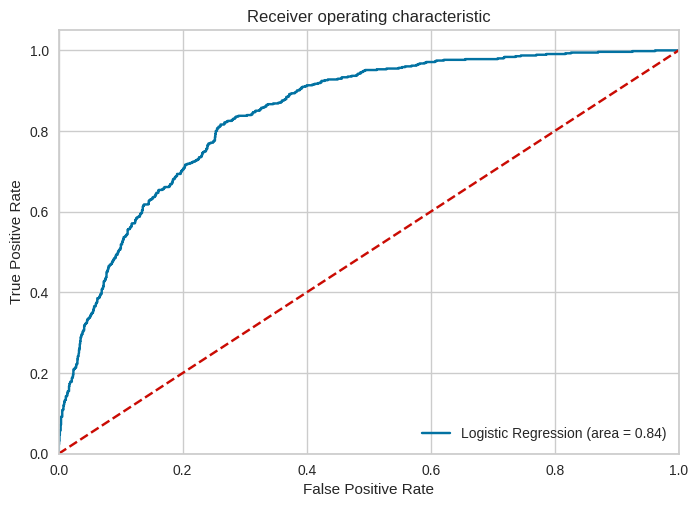

ROC AUC 0.7191477651284726


In [29]:
logit_roc_auc = roc_auc_score(y_testLR, logmodel.predict_proba(X_testLR)[:,1])
fpr, tpr, thresholds = roc_curve(y_testLR, logmodel.predict_proba(X_testLR)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print ('ROC AUC', roc_auc_score(y_testLR,y_predLR))

In [30]:
logit_model=sm.Logit(y_trainLR, X_trainLR)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.413979
         Iterations 8
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.287    
Dependent Variable:         y                       AIC:                     4123.2081
Date:                       2023-04-23 20:18        BIC:                     4279.2434
No. Observations:           4922                    Log-Likelihood:          -2037.6  
Df Model:                   23                      LL-Null:                 -2855.8  
Df Residuals:               4898                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             8.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z    P

In [31]:
df_dummies.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
#Dropping columns which dont have statistically significant effect whose p-value > 0.05
X = df_dummies.drop(['Churn','MonthlyCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check' ], axis = 1)
y = df_dummies['Churn'].values

In [33]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [34]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [35]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_trainLR,y_trainLR)

LogisticRegression(solver='liblinear')

In [36]:
y_predLR = logmodel.predict(X_testLR)

In [37]:
logmodel.coef_

array([[-2.90177382,  0.41800644,  0.28133297,  0.32756207,  0.74777303,
        -0.67156852,  0.28316696,  0.34099162, -0.80638235, -1.66556577,
         0.28474513,  0.40095619]])

In [38]:
confusion_matrix(y_testLR,y_predLR)

array([[1392,  163],
       [ 263,  292]])

In [39]:
print(classification_report(y_testLR,y_predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



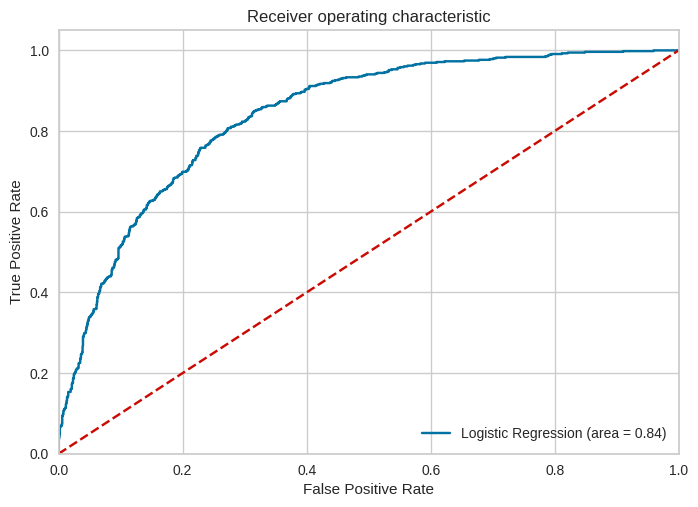

ROC AUC 0.710651487500362


In [40]:
logit_roc_auc = roc_auc_score(y_testLR, logmodel.predict_proba(X_testLR)[:,1])
fpr, tpr, thresholds = roc_curve(y_testLR, logmodel.predict_proba(X_testLR)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print ('ROC AUC', roc_auc_score(y_testLR,y_predLR))

## KNN

In [41]:
X = tcc_data.drop('Churn', axis=1)
y = tcc_data['Churn']

In [42]:
tcc_dummy = pd.get_dummies(tcc_data, drop_first=True)
X = tcc_dummy.drop('Churn', axis=1) # Features
y = tcc_dummy['Churn'] # Target

In [43]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [44]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_trainKNN, y_trainKNN)

y_predKNN = knn.predict(X_testKNN)

print("Confusion Matrix:")
print(confusion_matrix(y_testKNN,y_predKNN))
print("\nClassification Report:")
print(classification_report(y_testKNN,y_predKNN))

Confusion Matrix:
[[1309  246]
 [ 272  283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1555
           1       0.53      0.51      0.52       555

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110



In [46]:
print("Accuracy:", knn.score(X_testKNN, y_testKNN))
print('ROC AUC: ', roc_auc_score(y_testKNN,y_predKNN))

Accuracy: 0.7545023696682465
ROC AUC:  0.6758552764983634


In [47]:
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_trainKNN,y_trainKNN.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())
    optimal_k = np.argmax(cv_scores) + 1
print("Optimal k:", optimal_k)

Optimal k: 40


## Rerunning using optimal k value

In [48]:
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

knn.fit(X_trainKNN, y_trainKNN)
y_predKNN = knn.predict(X_testKNN)

print("Confusion Matrix:")
print(confusion_matrix(y_testKNN, y_predKNN))
print("\nClassification Report:")
print(classification_report(y_testKNN, y_predKNN))

Confusion Matrix:
[[1347  208]
 [ 248  307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1555
           1       0.60      0.55      0.57       555

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



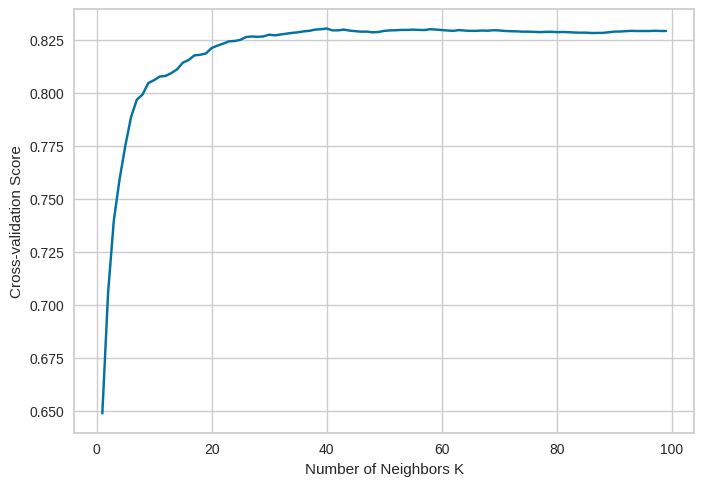

Optimal number of neighbors: 40
ROC AUC:  0.70969554763767
Accuracy: 0.7838862559241706


In [49]:
plt.plot(range(1,max_K), cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-validation Score')
plt.show()

optimal_K = np.argmax(cv_scores) + 1
print("Optimal number of neighbors:", optimal_K)
print('ROC AUC: ', roc_auc_score(y_testKNN,y_predKNN))
print("Accuracy:", knn.score(X_testKNN, y_testKNN))

## Decision tree, Random forest & Boosted tree

In [50]:
tcc_dummy = pd.get_dummies(tcc_data, drop_first=True)
X = tcc_dummy.drop('Churn', axis=1) # Features
y = tcc_dummy['Churn'] # Target

In [51]:
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
# Decision forest model

dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_traindt,y_traindt)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [53]:
y_pred_dt = dt_model.predict(X_testdt)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_testdt,y_pred_dt)

array([[1449,  106],
       [ 323,  232]])

In [55]:
print(classification_report(y_testdt,y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1555
           1       0.69      0.42      0.52       555

    accuracy                           0.80      2110
   macro avg       0.75      0.67      0.70      2110
weighted avg       0.78      0.80      0.78      2110



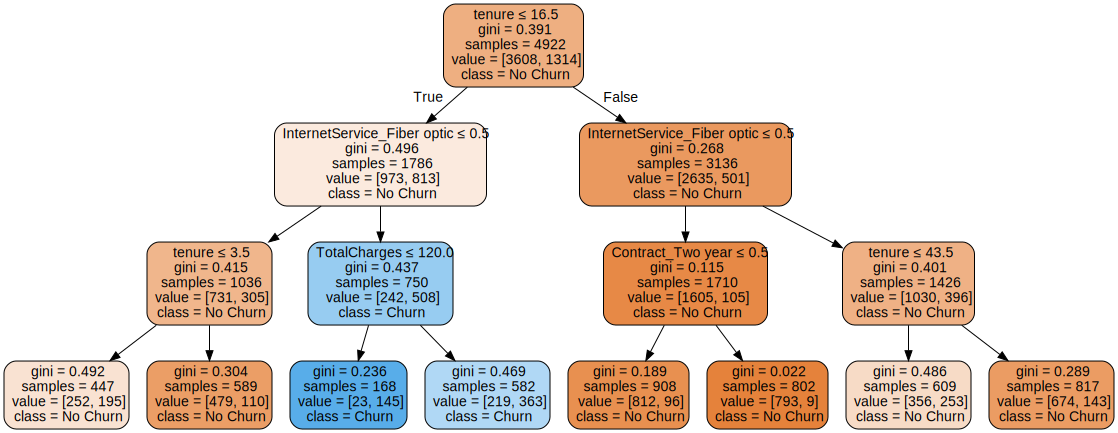

In [56]:
import graphviz 
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['No Churn','Churn'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [57]:
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
# Random forest model

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_trainrf,y_trainrf)

y_pred_rf = rf_model.predict(X_testrf)

confusion_matrix(y_testrf,y_pred_rf)

array([[1441,  114],
       [ 313,  242]])

In [59]:
print(classification_report(y_testrf,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1555
           1       0.68      0.44      0.53       555

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



In [60]:
X_trainbt, X_testbt, y_trainbt, y_testbt = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
# Boosted tree model

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_trainbt,y_trainbt)

y_pred_bt = bt_model.predict(X_testbt)

confusion_matrix(y_testbt,y_pred_bt)

array([[1398,  157],
       [ 263,  292]])

In [62]:
print(classification_report(y_testbt,y_pred_bt))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



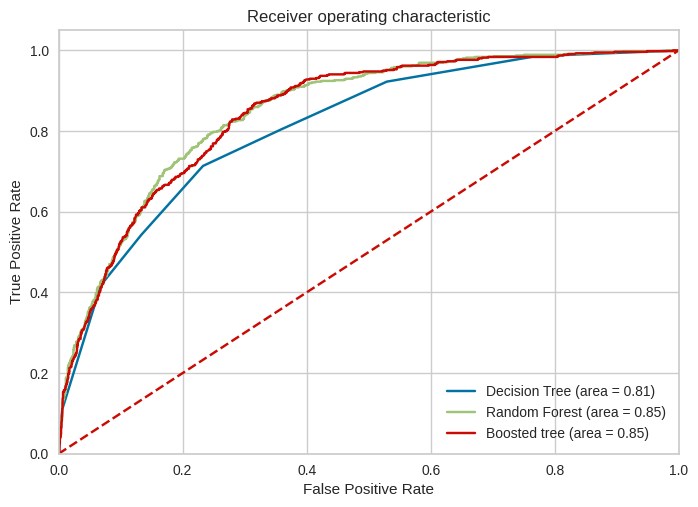

In [63]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_testrf, rf_model.predict_proba(X_testrf)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_testrf, rf_model.predict_proba(X_testrf)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_testbt, bt_model.predict_proba(X_testbt)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_testbt, bt_model.predict_proba(X_testbt)[:,1])

# Decision Tree
dt_roc_auc = roc_auc_score(y_testdt, dt_model.predict_proba(X_testdt)[:,1])
fpr, tpr, thresholds = roc_curve(y_testdt, dt_model.predict_proba(X_testdt)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
print('Random Forest ROC AUC score:', rf_roc_auc)
print('Boosted Tree ROC AUC score:', bt_roc_auc)
print('Decision Tree ROC AUC score:', dt_roc_auc)

Random Forest ROC AUC score: 0.8496671591205355
Boosted Tree ROC AUC score: 0.8456910286492281
Decision Tree ROC AUC score: 0.8113542481388141


## Naive Bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB 

In [66]:
tcc_dummy = pd.get_dummies(tcc_data, drop_first=True)
X = tcc_dummy.drop('Churn', axis=1) # Features
y = tcc_dummy['Churn'] # Target

In [67]:
X.loc[:, X.isnull().any()].columns

Index([], dtype='object')

In [68]:
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
churn_nb = MultinomialNB(alpha=0.01)
churn_nb.fit(X_trainNB, y_trainNB) 

y_predNB = churn_nb.predict(X_testNB)

print(confusion_matrix(y_testNB,y_predNB))
print(classification_report(y_testNB,y_predNB))

[[1043  512]
 [ 137  418]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1555
           1       0.45      0.75      0.56       555

    accuracy                           0.69      2110
   macro avg       0.67      0.71      0.66      2110
weighted avg       0.77      0.69      0.71      2110



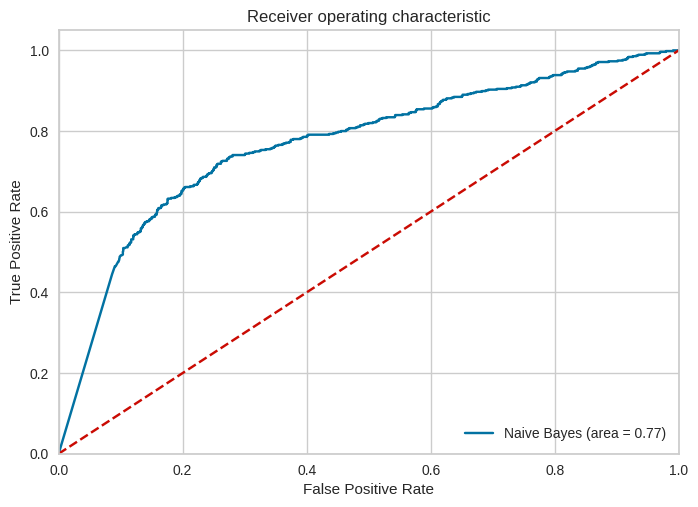

Naive Bayes ROC AUC score: 0.7693218620549811


In [70]:
nb_roc_auc = roc_auc_score(y_testNB, churn_nb.predict_proba(X_testNB)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_testNB, churn_nb.predict_proba(X_testNB)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('Naive Bayes ROC AUC score:', nb_roc_auc)

In [71]:
perm = PermutationImportance(churn_nb, random_state=1).fit(X_testNB, y_testNB)
eli5.show_weights(perm, feature_names = X_testNB.columns.tolist())

Weight,Feature
0.1149 ± 0.0230,TotalCharges
0.0972 ± 0.0135,MonthlyCharges
0.0040 ± 0.0010,TechSupport_No internet service
0.0039 ± 0.0018,InternetService_No
0.0038 ± 0.0000,StreamingTV_No internet service
0.0038 ± 0.0020,DeviceProtection_No internet service
0.0035 ± 0.0013,OnlineBackup_No internet service
0.0034 ± 0.0014,StreamingMovies_No internet service
0.0033 ± 0.0017,OnlineSecurity_No internet service
0.0028 ± 0.0017,InternetService_Fiber optic


## ANN CLASSIFICATION

In [72]:
X = tcc_data.drop('Churn', axis=1)
y = tcc_data['Churn']

In [73]:
# Dummying categorical variables
tcc_dummy = pd.get_dummies(tcc_data, drop_first=True)
X = tcc_dummy.drop('Churn', axis=1) # Features
y = tcc_dummy['Churn'] # Target

In [74]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [75]:
#Scalling the data into 0-1 range for ANN Classification
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [76]:
X_trainANN, X_testANN, y_trainANN, y_testANN = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [77]:
X_rescaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [78]:
MLPC_model = MLPClassifier(hidden_layer_sizes=30, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_trainANN, y_trainANN)

y_pred_ann = MLPC_model.predict(X_testANN)

print(confusion_matrix(y_testANN,y_pred_ann))
print(classification_report(y_testANN,y_pred_ann))

[[1388  167]
 [ 257  298]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [79]:
print('ROC AUC: ', roc_auc_score(y_testANN,MLPC_model.predict_proba(X_testANN)[:,1]))

ROC AUC:  0.8443023087396078


In [80]:
min_hidden_layer_size = 10  
max_hidden_layer_size = 100  

In [81]:
cv_scores = [] 

In [82]:
for hidden_layer_size in range(min_hidden_layer_size, max_hidden_layer_size+1, 5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', solver='sgd', max_iter=500, batch_size=128, alpha=0.0001,  early_stopping=True, random_state=1)
    scores = cross_val_score(MLPC_model, X_trainANN, y_trainANN.values.ravel(), cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<Axes: >

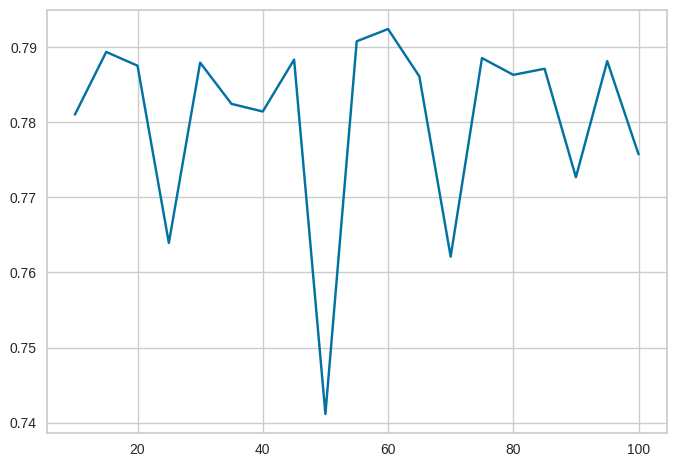

In [83]:
sns.lineplot(x=range(min_hidden_layer_size, max_hidden_layer_size+1, 5), y=cv_scores)

In [84]:
MLPC_model = MLPClassifier(hidden_layer_sizes=60, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_trainANN, y_trainANN)

y_pred_ann = MLPC_model.predict(X_testANN)

print(confusion_matrix(y_testANN,y_pred_ann))
print(classification_report(y_testANN,y_pred_ann))

[[1380  175]
 [ 253  302]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1555
           1       0.63      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [85]:
print('ROC AUC: ', roc_auc_score(y_testANN,MLPC_model.predict_proba(X_testANN)[:,1]))

ROC AUC:  0.8449349671214623


## Keras Classification

In [86]:
tcc_dummy = pd.get_dummies(tcc_data, drop_first=True)
X = tcc_dummy.drop('Churn', axis=1) # Features
y = tcc_dummy['Churn'] # Target

In [87]:
X_train, X_test, y_trainMLP, y_testMLP = train_test_split(X, y, test_size=0.3, random_state=1)

In [88]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_trainMLP = scaler.transform(X_train)
X_testMLP = scaler.transform(X_test)

In [89]:
X_trainMLP.shape

(4922, 30)

In [90]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [91]:
model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [92]:
history = model.fit(x=X_trainMLP, 
          y=y_trainMLP, 
          batch_size=128,
          epochs=200,
          validation_data=(X_testMLP, y_testMLP), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
39/39 [==============================] - 2s 12ms/step - loss: 0.5941 - val_loss: 0.4993
Epoch 2/200
39/39 [==============================] - 0s 5ms/step - loss: 0.5298 - val_loss: 0.4649
Epoch 3/200
39/39 [==============================] - 0s 5ms/step - loss: 0.5005 - val_loss: 0.4492
Epoch 4/200
39/39 [==============================] - 0s 6ms/step - loss: 0.4783 - val_loss: 0.4349
Epoch 5/200
39/39 [==============================] - 0s 6ms/step - loss: 0.4802 - val_loss: 0.4366
Epoch 6/200
39/39 [==============================] - 0s 6ms/step - loss: 0.4687 - val_loss: 0.4319
Epoch 7/200
39/39 [==============================] - 0s 7ms/step - loss: 0.4716 - val_loss: 0.4293
Epoch 8/200
39/39 [==============================] - 0s 6ms/step - loss: 0.4566 - val_loss: 0.4257
Epoch 9/200
39/39 [==============================] - 0s 5ms/step - loss: 0.4533 - val_loss: 0.4257
Epoch 10/200
39/39 [==============================] - 0s 6ms/step - loss: 0.4543 - val_loss: 0.4235
Epoch 11

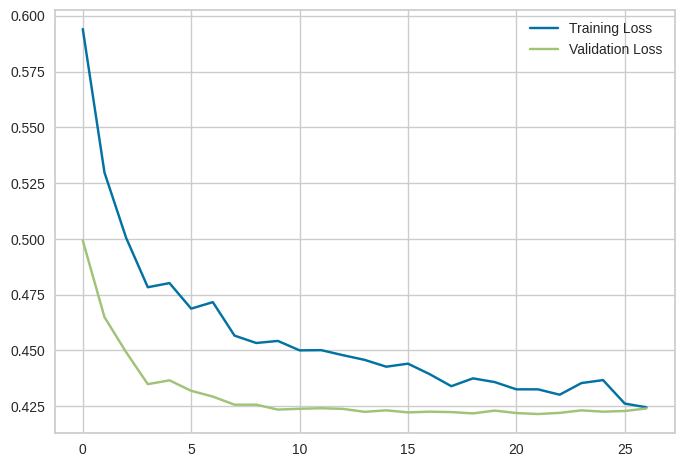

In [93]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [94]:
y_predMLP =(model.predict(X_testMLP) > 0.5).astype("int32")

66/66 [==============================] - 0s 2ms/step


In [95]:
print("Confusion Matrix:\n", confusion_matrix(y_testMLP, y_predMLP))
print("\nClassification Report:\n", classification_report(y_testMLP, y_predMLP))
print('ROC AUC: ', roc_auc_score(y_testMLP,model.predict(X_testMLP)))

Confusion Matrix:
 [[1394  161]
 [ 260  295]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

66/66 [==============================] - 0s 2ms/step
ROC AUC:  0.8395828626053706


In [96]:
model.predict(X_testMLP)

66/66 [==============================] - 0s 2ms/step


array([[0.0008324 ],
       [0.6744361 ],
       [0.04730491],
       ...,
       [0.22991192],
       [0.42069942],
       [0.00733287]], dtype=float32)

In [97]:
print(confusion_matrix(y_testMLP,y_predMLP))
print('ROC AUC: ', roc_auc_score(y_testMLP,model.predict(X_testMLP)))

[[1394  161]
 [ 260  295]]
66/66 [==============================] - 0s 2ms/step
ROC AUC:  0.8395828626053706


## Summary 

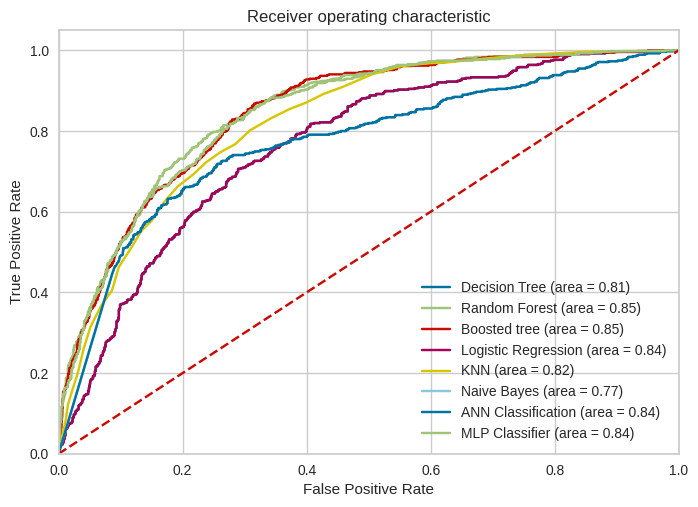

In [98]:
# Logistic Regression
logit_roc_auc = roc_auc_score(y_testLR, logmodel.predict_proba(X_testLR)[:,1])
fpr, tpr, thresholds = roc_curve(y_testLR, logmodel.predict_proba(X_testLR)[:,1])

# KNN
knn_roc_auc = roc_auc_score(y_testKNN, knn.predict_proba(X_testKNN)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_testKNN, knn.predict_proba(X_testKNN)[:,1])

# Random Forest 
rf_roc_auc = roc_auc_score(y_testrf, rf_model.predict_proba(X_testrf)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_testrf, rf_model.predict_proba(X_testrf)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_testbt, bt_model.predict_proba(X_testbt)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_testbt, bt_model.predict_proba(X_testbt)[:,1])

# Decision Tree
dt_roc_auc = roc_auc_score(y_testdt, dt_model.predict_proba(X_testdt)[:,1])
fpr, tpr, thresholds = roc_curve(y_testdt, dt_model.predict_proba(X_testdt)[:,1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_testNB, churn_nb.predict_proba(X_testNB)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_testNB, churn_nb.predict_proba(X_testNB)[:,1])

# ANN Classification
ann_roc_auc = roc_auc_score(y_testANN, MLPC_model.predict_proba(X_testANN)[:,1])
fpr, tpr, thresholds = roc_curve(y_testANN, churn_nb.predict_proba(X_testANN)[:,1])

# MLP Classifier
mlp_roc_auc = roc_auc_score(y_testMLP, MLPC_model.predict_proba(X_testMLP)[:,1])
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_testMLP, MLPC_model.predict_proba(X_testMLP)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='ANN Classification (area = %0.2f)' % ann_roc_auc)
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
print('Logistic Regression ROC AUC: ', logit_roc_auc)
print('KNN ROC AUC: ', knn_roc_auc)
print('Random Forest ROC AUC score:', rf_roc_auc)
print('Boosted Tree ROC AUC score:', bt_roc_auc)
print('Decision Tree ROC AUC score:', dt_roc_auc)
print('Naive Bayes ROC AUC score:', nb_roc_auc)
print('ANN ROC AUC score:', ann_roc_auc)
print('MLP Classifier ROC AUC score:', mlp_roc_auc)

Logistic Regression ROC AUC:  0.8397833202977897
KNN ROC AUC:  0.8240856290373976
Random Forest ROC AUC score: 0.8496671591205355
Boosted Tree ROC AUC score: 0.8456910286492281
Decision Tree ROC AUC score: 0.8113542481388141
Naive Bayes ROC AUC score: 0.7693218620549811
ANN ROC AUC score: 0.8449349671214623
MLP Classifier ROC AUC score: 0.8449349671214623


In [100]:
scores = {'Logistic Regression': roc_auc_score(y_testLR,y_predLR),
          'KNN': roc_auc_score(y_testKNN,y_predKNN),
          'Random Forest': rf_roc_auc,
          'Boosted Tree': bt_roc_auc,
          'Decision Tree': dt_roc_auc,
          'Naive Bayes': nb_roc_auc,
          'ANN Classification': ann_roc_auc,
          'MLP Classifier': mlp_roc_auc}
best_model = max(scores, key=scores.get)
print('Best Model:', best_model, 'ROC AUC score:', scores[best_model])

Best Model: Random Forest ROC AUC score: 0.8496671591205355


In [101]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

models = {'Logistic Regression': (y_predLR, y_testLR),
          'KNN': (y_predKNN, y_testKNN),
          'Random Forest': (y_pred_rf, y_testrf),
          'Boosted Tree': (y_pred_bt, y_testbt),
          'Decision Tree': (y_pred_dt, y_testdt),
          'Naive Bayes': (y_predNB, y_testNB),
          'ANN Classification': (y_pred_ann, y_testANN),
          'MLP Classifier': (y_predMLP, y_testMLP)}

# Create an empty DataFrame to store the classification reports
report_df = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC Score', 'Precision', 'Recall', 'F1-Score'])

# Loop through each model and add its classification report to the DataFrame
for model_name, (y_pred, y_test) in models.items():
    # Convert y_pred and y_test to binary labels using a threshold of 0.5
    y_pred_binary = (y_pred > 0.5).astype(int)
    y_test_binary = (y_test > 0.5).astype(int)
    
    # Calculate accuracy and ROC AUC score
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    if model_name == 'Logistic Regression':
        roc_auc = logit_roc_auc
    elif model_name == 'KNN':
        roc_auc = knn_roc_auc
    elif model_name == 'Random Forest':
        roc_auc = rf_roc_auc
    elif model_name == 'Boosted Tree':
        roc_auc = bt_roc_auc
    elif model_name == 'Decision Tree':
        roc_auc = dt_roc_auc
    elif model_name == 'Naive Bayes':
        roc_auc = nb_roc_auc
    elif model_name == 'ANN Classification':
        roc_auc = ann_roc_auc
    elif model_name == 'MLP Classifier':
        roc_auc = mlp_roc_auc
    elif model_name == 'SVM Classifier':
        roc_auc = roc_auc_score(y_test, model.predict(X_test))
    
    # Calculate classification report
    report = classification_report(y_test_binary, y_pred_binary, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Append metrics to report DataFrame
    report_df = report_df.append({'Model': model_name, 'Accuracy': accuracy, 'ROC AUC Score': roc_auc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}, ignore_index=True)

# Print the DataFrame
print(report_df)


                 Model  Accuracy  ROC AUC Score  Precision    Recall  F1-Score
0  Logistic Regression  0.798104       0.839783   0.788657  0.798104  0.791254
1                  KNN  0.783886       0.824086   0.779177  0.783886  0.781219
2        Random Forest  0.797630       0.849667   0.784259  0.797630  0.781613
3         Boosted Tree  0.800948       0.845691   0.791336  0.800948  0.793721
4        Decision Tree  0.796682       0.811354   0.783176  0.796682  0.778610
5          Naive Bayes  0.692417       0.769322   0.769627  0.692417  0.710167
6   ANN Classification  0.797156       0.844935   0.789321  0.797156  0.791972
7       MLP Classifier  0.800474       0.844935   0.791284  0.800474  0.793783


## Using pycaret

In [102]:
setup(data=tcc_data, target='Churn', session_id=42)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 20)"
4,Transformed data shape,"(7032, 41)"
5,Transformed train set shape,"(4922, 41)"
6,Transformed test set shape,"(2110, 41)"
7,Ordinal features,6
8,Numeric features,3
9,Categorical features,16


In [103]:
with mlflow.start_run(run_name='tcc_classification'):

    # Compare the performance of multiple models
    best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8050,0.8483,0.5535,0.6596,0.6016,0.4738,0.4772,1.5780
nb,Naive Bayes,0.6963,0.8242,0.8509,0.4616,0.5984,0.3872,0.4342,0.5220
lr,Logistic Regression,0.8003,0.8475,0.5512,0.6460,0.5948,0.4633,0.4660,1.9240
gbc,Gradient Boosting Classifier,0.8045,0.8476,0.5344,0.6648,0.5923,0.4658,0.4707,1.3960
lda,Linear Discriminant Analysis,0.7964,0.8394,0.5551,0.6336,0.5916,0.4569,0.4587,1.0440
lightgbm,Light Gradient Boosting Machine,0.7987,0.8383,0.5375,0.6467,0.5865,0.4550,0.4588,1.2300
qda,Quadratic Discriminant Analysis,0.6737,0.8312,0.8638,0.4437,0.5844,0.3599,0.4177,0.4700
ridge,Ridge Classifier,0.7983,0.0000,0.5138,0.6533,0.5751,0.4453,0.4509,0.8460
rf,Random Forest Classifier,0.7974,0.8277,0.4977,0.6574,0.5663,0.4374,0.4448,1.2420
xgboost,Extreme Gradient Boosting,0.7842,0.8249,0.5122,0.6140,0.5581,0.4169,0.4202,1.5740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]